In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import chirallag as cL

In [2]:
number_predictions=100000
N = 3
N=3
F0 = 1

gens = cL.gen_gellman(3)
pi=np.random.rand(number_predictions,N*N-1)
dpi=np.random.rand(number_predictions,N*N-1)
orig_V = cL.get_V(pi,dpi,gens,F0).real

In [212]:
#df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/mombasis.csv',header = None))
#pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
#dpi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_dpi.csv',header= None))
#V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))
df_pions = np.zeros((pi.shape[0],17))
df_pions[:,:8] = pi
df_pions[:,8:16] = dpi
df_pions[:,-1] = orig_V.transpose()
#np.random.shuffle(df_pions)
train_x, train_y = df_pions[:-10000,:], (-df_pions[:-10000,-1])

val_x, val_y = df_pions[-10000:,:], (-df_pions[-10000:,-1])
print(np.mean(train_y))


0.1950122695699653


In [213]:
unshuffled_potential_values = df_pions[:,-1].copy()
shufffled_potential_values = unshuffled_potential_values.copy()
np.random.shuffle(shufffled_potential_values)
random_mean_absolute_errro = np.mean(abs(unshuffled_potential_values-shufffled_potential_values))
print('Random mae = ',random_mean_absolute_errro)
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))

Random mae =  0.14211577041224627
Mean Potential Value =  -0.19510544438272082


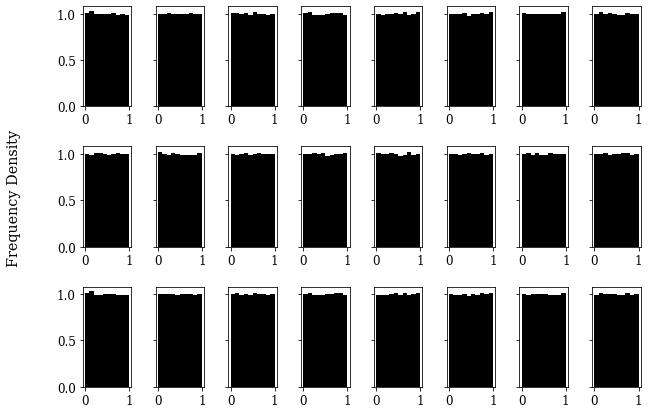

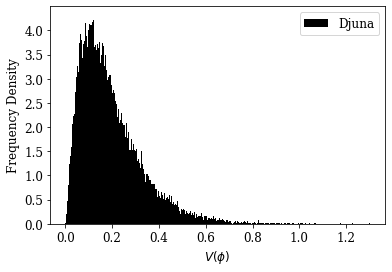

In [214]:
fig , ax = plt.subplots(3,8,sharey= True, figsize = (10,7))
plt.subplots_adjust(hspace= 0.4,wspace= 0.5)
for i in range(8):
    ax[0,i].hist(pi[:,i], density = True, color = 'black') 
    ax[1,i].hist(dpi[:,i],density = True, color = 'black')
    ax[2,i].hist(df_pions[:,i],density = True,color = 'black')
fig.supylabel('Frequency Density')


fig_2 = plt.figure()
plt.hist(train_y,density= True, bins = 1000, color = 'black',label=  'Djuna')
#plt.hist(abs(orig_V),density= True, bins = 50, color = 'blue',label= 'Daniel')
plt.xlabel('$V(\phi)$')
plt.ylabel('Frequency Density')
plt.legend()
fig.savefig('../Figures/PionsDVD.png',dpi = 200)
fig_2.savefig('../Figures/potentialDVD.png',dpi = 200)

In [215]:
epsilon_vdiff = pd.read_csv('../Training_Data/symetric_training_data_epsilon_and_vdiff.csv')
epsilon_vdiff.columns


Index(['Unnamed: 0', 'epsilon', 'SOdiff', 'SUdiff'], dtype='object')

(0.0005623413251903491, 1)

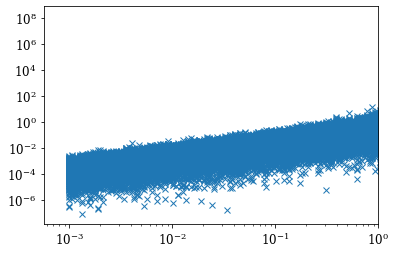

In [216]:
plt.loglog(epsilon_vdiff['epsilon'],epsilon_vdiff['SOdiff'],linestyle = '',marker ='x')
plt.xlim(right = 1)

In [217]:
opt = keras.optimizers.Adam(learning_rate= 0.005,amsgrad= True)


In [218]:

model = models.Sequential()

model.add(layers.Dense(512,activation= 'relu',input_shape = (train_x.shape[1],),kernel_initializer= 'he_normal'))
model.add(layers.Dense(512,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(512,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               9216      
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 513       
Total params: 535,041
Trainable params: 535,041
Non-trainable params: 0
_________________________________________________________________


In [219]:
epoch_num = 100

In [220]:

model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 256 , epochs = epoch_num)

Epoch 1/100
352/352 [==============================] - 1s 2ms/step - loss: 99.3339 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 99.3339 - val_loss: 6.3162 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 6.3162
Epoch 2/100
352/352 [==============================] - 1s 2ms/step - loss: 7.0377 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 7.0377 - val_loss: 5.5127 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 5.5127
Epoch 3/100
352/352 [==============================] - 1s 2ms/step - loss: 5.2521 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 5.2521 - val_loss: 4.0774 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 4.0774
Epoch 4/100
352/352 [==============================] - 1s 2ms/step - loss: 4.8311 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 4.8311 - val_loss: 2.7214 - val_mean_absolute_error: 0.0033 - val_mean_absolute_percentage_error: 2

In [226]:
history = model.history


In [227]:
epoch_num = len(history.history['mean_absolute_error'])
epochs = np.arange(1,epoch_num+1)
mae = history.history['mean_absolute_error']
mape = 4*np.array(history.history['mean_absolute_percentage_error'])
val_mae = np.array(history.history['val_mean_absolute_error'])
val_mape = 4*np.array(history.history['val_mean_absolute_percentage_error'])
loss = history.history['loss']
val_loss = np.array(history.history['val_loss'])

In [228]:
print(np.min(val_mape)/4)

0.4302217364311218


In [229]:

val_mae_smooth = cf.exponetial_smoothing(val_mae,0.4)
val_loss_smooth = cf.exponetial_smoothing(val_loss,0.4)
val_mape_smooth = cf.exponetial_smoothing(val_mape,0.4)


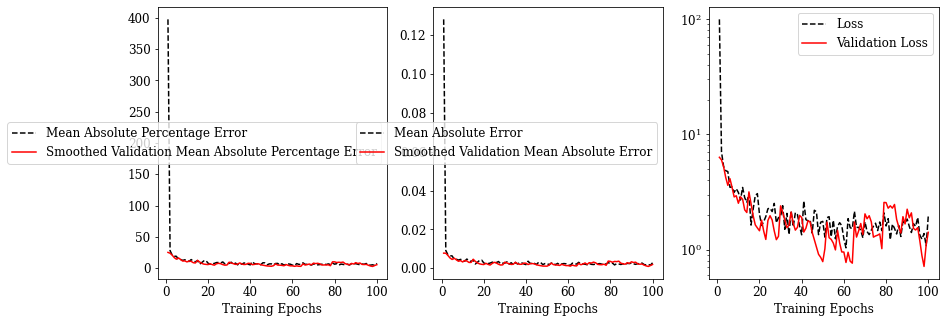

In [230]:
matplotlib.rcParams.update({'legend.fontsize': 12})
fig_3, axs  = plt.subplots(1,3, figsize= (14,5))
axs[0].plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs[0].plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Percentage Error')
axs[0].set_xlabel('Training Epochs')
#axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(epochs,mae, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[1].plot(epochs,val_mae_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Error')
axs[1].set_xlabel('Training Epochs')
#axs[1].set_yscale('log')
axs[1].legend()

cut = None
axs[2].plot(epochs[:cut],loss[:cut], label = 'Loss',c = 'black',linestyle = '--')
axs[2].plot(epochs[:cut],val_loss_smooth[:cut], label = 'Validation Loss',c = 'red')
axs[2].set_xlabel('Training Epochs')
axs[2].set_yscale('log')
axs[2].legend()

In [231]:
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))
print('')

Mean Potential Value =  -0.19510544438272082



In [232]:
fig.savefig('../Figures/Pions.png',dpi = 200)
fig_2.savefig('../Figures/potential.png',dpi = 200)
fig_3.savefig('../Figures/Inital_poc.png',dpi = 200)

In [233]:
test_pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
test_dpi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_dpi.csv',header= None))
test_V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))

In [236]:
test = np.hstack((test_pi,test_dpi,test_V))
result = ((model.predict(test)))

In [237]:
mean = []
chunk = 100
chunk_size  = len(result)//chunk
for i in range(chunk):
    mean.append(np.mean(abs(np.array((result+test_V)/test_V))[chunk_size*i:chunk_size*(i+1)]))
mean = np.array(mean)
std = np.std(mean)
mean = np.mean(mean)
print('mean is = ', mean, 'STD is = ', std)



mean is =  0.018776351532360153 STD is =  0.0006230269972658739
